In [2]:
# https://www.youtube.com/watch?v=ujId4ipkBio

In [2]:
import pandas as pd
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('english')



from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import MWETokenizer
from nltk.tokenize import WordPunctTokenizer

import re

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KleinMD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KleinMD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
!pip install yfinance

In [368]:
import yfinance as yf

In [393]:
ticker = ['AAPL']
#YYYY-MM-DD
start= '2010-01-01'
end= '2010-12-31'
stock = pd.DataFrame(yf.download(ticker,start,end))
#positive differenz = aktie gestiegen, negative differenz aktie gesunken
stock['Daily Returns'] = ((stock['Adj Close'] / stock['Adj Close'].shift(1)) - 1)*100
stock.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Daily Returns
Date,,,,,,,
2009-12-31,7.611786,7.619643,7.520000,7.526072,6.492372,352410800,NaN
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.593426,493729600,1.556499
2010-01-05,7.664286,7.699643,7.616071,7.656428,6.604825,601904800,0.172888
2010-01-06,7.656428,7.686786,7.526786,7.534643,6.499768,552160000,-1.590614
2010-01-07,7.562500,7.571429,7.466072,7.520714,6.487752,477131200,-0.184858


In [401]:
print(stock[stock.columns[0]])

Date
2009-12-31     7.611786
2010-01-04     7.622500
2010-01-05     7.664286
2010-01-06     7.656428
2010-01-07     7.562500
                ...    
2010-12-23    11.607142
2010-12-27    11.530357
2010-12-28    11.639643
2010-12-29    11.650714
2010-12-30    11.624286
Name: Open, Length: 252, dtype: float64


In [423]:

return_jan2010 = stock.iloc[0:20]['Daily Returns'].mean()
return_feb2010 = stock.iloc[20:40]['Daily Returns'].mean()
return_mar2010 = stock.iloc[40:60]['Daily Returns'].mean()
return_apr2010 = stock.iloc[60:80]['Daily Returns'].mean()
return_may2010 = stock.iloc[80:100]['Daily Returns'].mean()
return_jun2010 = stock.iloc[100:120]['Daily Returns'].mean()
return_jul2010 = stock.iloc[120:140]['Daily Returns'].mean()
return_aug2010 = stock.iloc[140:160]['Daily Returns'].mean()
return_sep2010 = stock.iloc[80:100]['Daily Returns'].mean()
return_oct2010 = stock.iloc[80:100]['Daily Returns'].mean()

dict_stock = {'Jan 2010': return_jan2010,
              'Feb 2010': return_feb2010,
              'Mar 2010': return_mar2010,
              'Apr 2010': return_apr2010,
              'May 2010': return_may2010,
              'Jun 2010': return_jun2010,
              'Jul 2010': return_jul2010,
              'Aug 2010': return_aug2010,
              'Sep 2010': return_sep2010,
              'Oct 2010': return_oct2010
              
                
}



In [387]:
#für folgende parts https://alexandrenesovic.com/2019/11/17/how-to-find-import-and-plot-historical-financial-data-with-yfinance-python-and-how-to-calculate-the-daily-returns/
apple_daily_returns = ((stock['Adj Close'] / stock['Adj Close'].shift(1)) - 1)*100
apple_daily_returns = apple_daily_returns.to_frame()
apple_daily_returns.columns = ['Daily Return in %']

TypeError: 'str' object is not callable

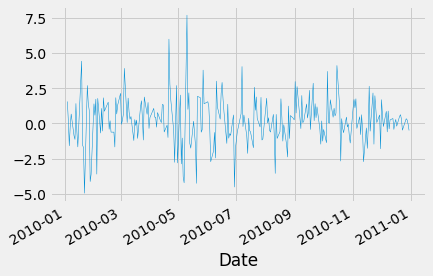

In [388]:
apple_daily_returns['Daily Return in %'].plot(linewidth = 0.5)
plt.title('Apple Daily Returns')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.show()

In [4]:
import twint
import nest_asyncio
nest_asyncio.apply()

from datetime import datetime
since = '2010-11-14 14:32:30'
until = '2010-12-14 14:32:30'
format = '%Y-%m-%d %H:%M:%S'
storage_file = 'C:/Users/KleinMD/Desktop/MachineLearning/Datasets/tweets_mba.csv'

since_format = datetime.strptime(since, format)
until_format = datetime.strptime(until, format)

t = twint.Config()
t.Search = '#AAPL'
t.Since = since
t.Until = until
t.Store_object = True
t.Lang = 'en'
t.Limit = 10
t.Store_csv = True
t.Pandas =True
twint.run.Search(t)

def twint_to_pandas(columns):
    return twint.output.panda.Tweets_df[columns]

df = twint_to_pandas(["date", "username", "tweet"])
#df_pd.to_csv(storage_file)


df.head()
#tlist = t.search_tweet_list

#print(tlist)

14449718029451264 2010-12-13 23:40:55 +0100 <ollierbrssfeeds> Goldman Sachs resumes #Apple coverage, targets #AAPL at $430  http://goo.gl/fb/pEQSf #2010 #financial #goldmansachs
14443115377074177 2010-12-13 23:14:41 +0100 <swtill> @MadMoneyOnCNBC BIG money on #aapl WOO HOO #oinkoink
14438576980754432 2010-12-13 22:56:39 +0100 <ketnn> Goldman Sachs resumes #Apple coverage, targets #AAPL at $430  http://goo.gl/fb/ngD2u #Apple #2010 #financial
14435566858805248 2010-12-13 22:44:41 +0100 <edb_trading> Missed 4,000% Apple Rally? So Did Company   #aapl #apple   http://bit.ly/f4ChHI
14433264987017216 2010-12-13 22:35:33 +0100 <Urvaksh> Now this is a #wikileak to get all excited about: 140,000 Steve Jobs emails leaked  http://j.mp/gcOPVt  #AAPL
14428709075288064 2010-12-13 22:17:26 +0100 <Ratchakorn> Goldman Sachs ตั้งเป้า #AAPL ที่ $430 *0*  http://aol.it/h0z6nH
14411645270884352 2010-12-13 21:09:38 +0100 <Mr_um> #aapl Apple bagging wintel PCs.
14407086557372416 2010-12-13 20:51:31 +0100 <Rat

,date,username,tweet
0,2010-12-13 23:40:55,ollierbrssfeeds,"Goldman Sachs resumes #Apple coverage, targets..."
1,2010-12-13 23:14:41,swtill,@MadMoneyOnCNBC BIG money on #aapl WOO HOO #oi...
2,2010-12-13 22:56:39,ketnn,"Goldman Sachs resumes #Apple coverage, targets..."
3,2010-12-13 22:44:41,edb_trading,"Missed 4,000% Apple Rally? So Did Company #a..."
4,2010-12-13 22:35:33,Urvaksh,Now this is a #wikileak to get all excited abo...


In [28]:
def clean_tweets(tweet):
    user_removed = re.sub(r'@[A-Za-z0-9]+','',tweet)
    link_removed = re.sub('https?://[A-Za-z0-9./]+','',user_removed)
    only_alphanumeric = re.sub('[^a-zA-Z0-9]', ' ', user_removed)
    lower_case_tweet = only_alphanumeric .lower()
    tok = WordPunctTokenizer()
    words = tok.tokenize(lower_case_tweet)
    clean_tweet = (' '.join(words)).strip()
    return clean_tweet 

# have to use this in order to avoid 'A value is trying to be set on a copy of a slice from a DataFrame.'
df_clean = pd.DataFrame(columns =['date', 'username','tweet'])
df_clean['tweet'] = df['tweet'].apply(clean_tweets)
df_clean['date'] = df['date']
df_clean['username'] = df['username']
df_clean.head()


,date,username,tweet
0,2010-10-31 20:16:16,nlitvinoff,rendimiento s p 500 5ta semana de octubre 2010...
1,2010-10-31 20:11:22,VisualB2B,rt why apple sued motorola over iphone patents...
2,2010-10-31 20:09:21,edwinbeall,rt why apple sued motorola over iphone patents...
3,2010-10-31 19:55:34,ceoworld,why apple sued motorola over iphone patents ht...
4,2010-10-30 22:05:43,Urvaksh,suggestions for a good rss client for mac some...


In [11]:
df_clean['tweet'] = df_clean['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_clean.head()

,date,username,tweet
0,2010-12-13 23:40:55,ollierbrssfeeds,goldman sachs resumes apple coverage targets a...
1,2010-12-13 23:14:41,swtill,big money aapl woo hoo oinkoink
2,2010-12-13 22:56:39,ketnn,goldman sachs resumes apple coverage targets a...
3,2010-12-13 22:44:41,edb_trading,missed 4 000 apple rally company aapl apple ht...
4,2010-12-13 22:35:33,Urvaksh,wikileak get excited 140 000 steve jobs emails...


In [12]:
import wordcloud as WordCloud
#df_string['Tweets'] = df['Tweets'].astype(str)

wc_text =  ' '.join(word for word in df_clean['tweet'])
print(wc_text)

cloud = WordCloud.WordCloud()
cloud.generate(wc_text)

plt.imshow(cloud, interpolation = 'nearest')
plt.axis('off')
plt.show()


goldman sachs resumes apple coverage targets aapl 430 http goo gl fb peqsf 2010 financial goldmansachs big money aapl woo hoo oinkoink goldman sachs resumes apple coverage targets aapl 430 http goo gl fb ngd2u apple 2010 financial missed 4 000 apple rally company aapl apple http bit ly f4chhi wikileak get excited 140 000 steve jobs emails leaked http j mp gcopvt aapl goldman sachs aapl 430 0 http aol h0z6nh aapl apple bagging wintel pcs apple aapl http bit ly g2w4mh aapl 325 goldman sachs investors say stock worth 400 next year look aapl go gapped like crazy wish still position 280 nexttime stocks least good news price target aapl raised 430 gs new time highs morning take aapl considering competition android os tablets coming market aapl 320 56 12 13 2010 current max pain strike price 310 00 put call ratio 0 600 aapl thanks aapl fixed ipad wifi issue netgear router needed new firmware delete add ssid ipad ftl rendimiento p 500 2da semana de diciembre 2010 http bit ly ge5jmk spy aapl eu

ImportError: The _imagingft C module is not installed

In [13]:
stopwords = list(stop) + ['https'] + ['co'] + ['http']
df_clean['tweet'] = df_clean['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

df_string = df_clean['tweet'].astype(str)

wc_text =  ' '.join(word for word in df_string)


cloud = WordCloud.WordCloud()
cloud.generate(wc_text)

plt.imshow(cloud, interpolation = 'nearest')
plt.axis('off')
plt.show()

ImportError: The _imagingft C module is not installed

In [14]:
def getSubjectivity(clean_tweets):
  return TextBlob(clean_tweets).sentiment.subjectivity

def getPolarity(clean_tweets):
  return TextBlob(clean_tweets).sentiment.polarity

df_clean['Subjectivity'] = df_clean['tweet'].apply(getSubjectivity)
df_clean['Polarity'] = df_clean['tweet'].apply(getPolarity)

df_clean.head()

,date,username,tweet,Subjectivity,Polarity
0,2010-12-13 23:40:55,ollierbrssfeeds,goldman sachs resumes apple coverage targets a...,0.00,0.000
1,2010-12-13 23:14:41,swtill,big money aapl woo hoo oinkoink,0.10,0.000
2,2010-12-13 22:56:39,ketnn,goldman sachs resumes apple coverage targets a...,0.00,0.000
3,2010-12-13 22:44:41,edb_trading,missed 4 000 apple rally company aapl apple bi...,0.00,0.000
4,2010-12-13 22:35:33,Urvaksh,wikileak get excited 140 000 steve jobs emails...,0.75,0.375


In [15]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df_clean['Analysis'] = df_clean['Polarity'].apply(getAnalysis)
df_clean.head()

,date,username,tweet,Subjectivity,Polarity,Analysis
0,2010-12-13 23:40:55,ollierbrssfeeds,goldman sachs resumes apple coverage targets a...,0.00,0.000,Neutral
1,2010-12-13 23:14:41,swtill,big money aapl woo hoo oinkoink,0.10,0.000,Neutral
2,2010-12-13 22:56:39,ketnn,goldman sachs resumes apple coverage targets a...,0.00,0.000,Neutral
3,2010-12-13 22:44:41,edb_trading,missed 4 000 apple rally company aapl apple bi...,0.00,0.000,Neutral
4,2010-12-13 22:35:33,Urvaksh,wikileak get excited 140 000 steve jobs emails...,0.75,0.375,Positive


<function matplotlib.pyplot.show(close=None, block=None)>

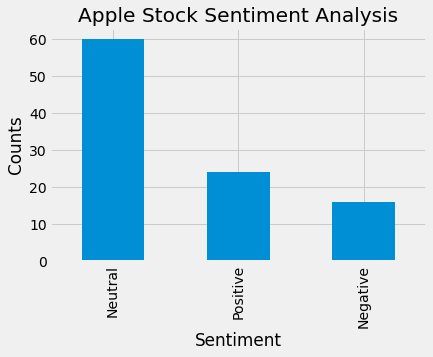

In [16]:
df_clean['Analysis'].value_counts()

plt.title('Apple Stock Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_clean['Analysis'].value_counts().plot(kind = 'bar')
plt.show

In [5]:
since = '2010-11-14 14:32:30'
until = '2010-12-14 14:32:30'
format = '%Y-%m-%d %H:%M:%S'
storage_file = 'C:/Users/KleinMD/Desktop/MachineLearning/Datasets/tweets_mba.csv'

since_format = datetime.strptime(since, format)
until_format = datetime.strptime(until, format)

t = twint.Config()
t.Search = '#AAPL'
t.Since = since
t.Until = until
t.Store_object = True
t.Lang = 'en'
t.Limit = 10
t.Store_csv = True
t.Pandas =True
twint.run.Search(t)

def twint_to_pandas(columns):
    return twint.output.panda.Tweets_df[columns]

df = twint_to_pandas(["date", "username", "tweet"])

14449718029451264 2010-12-13 23:40:55 +0100 <ollierbrssfeeds> Goldman Sachs resumes #Apple coverage, targets #AAPL at $430  http://goo.gl/fb/pEQSf #2010 #financial #goldmansachs
14443115377074177 2010-12-13 23:14:41 +0100 <swtill> @MadMoneyOnCNBC BIG money on #aapl WOO HOO #oinkoink
14438576980754432 2010-12-13 22:56:39 +0100 <ketnn> Goldman Sachs resumes #Apple coverage, targets #AAPL at $430  http://goo.gl/fb/ngD2u #Apple #2010 #financial
14435566858805248 2010-12-13 22:44:41 +0100 <edb_trading> Missed 4,000% Apple Rally? So Did Company   #aapl #apple   http://bit.ly/f4ChHI
14433264987017216 2010-12-13 22:35:33 +0100 <Urvaksh> Now this is a #wikileak to get all excited about: 140,000 Steve Jobs emails leaked  http://j.mp/gcOPVt  #AAPL
14428709075288064 2010-12-13 22:17:26 +0100 <Ratchakorn> Goldman Sachs ตั้งเป้า #AAPL ที่ $430 *0*  http://aol.it/h0z6nH
14411645270884352 2010-12-13 21:09:38 +0100 <Mr_um> #aapl Apple bagging wintel PCs.
14407086557372416 2010-12-13 20:51:31 +0100 <Rat

In [7]:
from dateutil.relativedelta import *
from dateutil.rrule import *

In [22]:


datelist = pd.Series(['2010-01-01 00:00:00','2010-02-01 00:00:00','2010-03-01 00:00:00','2010-04-01 00:00:00'])
test = []
use_date = '2010-01-01 00:00:00'
count = 10 #dt.month(end_format)-dt.month(start_month)
start = '2010-01-01 00:00:00'
end ='2020-01-01 00:00:00'
format = '%Y-%m-%d %H:%M:%S'
start_format = datetime.strptime(start, format)
end_format = datetime.strptime(end, format)
storage_file = 'C:/Users/KleinMD/Desktop/MachineLearning/Datasets/tweets_mba.csv'


for x in range (0,count):
    
   # test[i]= datetime.strptime(datelist[x], format)
    use_date = start_format + relativedelta(months =+x)
   # use_date = datetime.strptime(datelist[x], format)
   # use_date = use_date + relativedelta(months =+x)
    t = twint.Config()
    t.Search = '#AAPL'
    t.Since = use_date.strftime(format)
    t.Until = (use_date +relativedelta(months =+1)).strftime(format)
    t.Store_object = True
    t.Lang = 'en'
    t.Limit = 10
    t.Store_csv = True
    t.Pandas =True
    twint.run.Search(t)
    
    df = twint_to_pandas(["date", "username", "tweet"])
    df.to_csv(storage_file, mode='a')
    #test.append(use_date)
   # print(test)
    

8467667935 2010-01-31 22:59:41 +0100 <StockAAPL> @LuckyRobJ I'm thinking of hiding sensors to track #Apple Store visitors and automating my #AAPL stock purchases accordingly.: @LuckyR...
8467632930 2010-01-31 22:58:35 +0100 <abashford> @LuckyRobJ I'm thinking of hiding sensors to track #Apple Store visitors and automating my #AAPL stock purchases accordingly.
8462693476 2010-01-31 20:24:36 +0100 <StockAAPL> Just setup my #Scottrade account; kick-starting February with my first trade #AAPL: Just setup my #Scottrade account; kick-starting Fe...
8461379159 2010-01-31 19:42:59 +0100 <954life> Looking forward to the #goog #aapl grudge match, but hope #gmail and goog apps remain integrated on aapl products  http://tr.im/MhYp
8456854000 2010-01-31 17:18:01 +0100 <StockAAPL> Actually, I'm surprised... I thought #iTunes was a larger source of revenue than it actually is.  http://bit.ly/aDYX3U #apple #aapl: Ac...
8456105415 2010-01-31 16:53:48 +0100 <LuckyRobJ> Actually, I'm surprised... I thoug

9779176995 2010-02-28 16:02:39 +0100 <brokerz_nasdaq> RT @actionjaxon666 - Riding high. #AAPL $AAPL  http://brokerz.com/_w2H/
9777295027 2010-02-28 15:05:26 +0100 <themaxpain> $AAPL ($204.62), current max pain strike price: $200.00.  Put/Call ratio: 0.802. #AAPL Get more at  http://bit.ly/9xXGzk
9761680170 2010-02-28 05:20:53 +0100 <HottTrends> Hot Stock Trends  http://hotstocktrends.blogspot.com/?spref=tw #aapl #stock #iphone
9760133189 2010-02-28 04:40:34 +0100 <spreadking> Hot Stock Trends  http://hotstocktrends.blogspot.com/?spref=tw #aapl #stock #iphone
9722476533 2010-02-27 10:15:23 +0100 <iMorpheus> 18:12 JST [#Starbucks #SitRep #AAPL: Stuck using pen & paper. I need an iPad.] EOT
9678894223 2010-02-26 15:05:26 +0100 <themaxpain> $AAPL ($202.00), current max pain strike price: $200.00.  Put/Call ratio: 0.771. #AAPL Get more at  http://bit.ly/9xXGzk
9670217477 2010-02-26 09:53:58 +0100 <RT_steve_jobs> RT @Sophist_   http://bit.ly/41sRgx #AAPL
9669608605 2010-02-26 09:28:43 +0100 

11390794533 2010-04-01 00:40:38 +0100 <atlantechatlbiz> Jesus drives a silver Mercedes, curses a lot and shops at Whole Foods  http://tinyurl.com/yham5ks #AAPL
11390761705 2010-04-01 00:39:54 +0100 <ForexDudes> Stock Market... #aapl #avt #belm #cb #contributor #economy #externalresearch #japan #ldk #mcd #nflx #rimm #stocks #t #ubs #usa #vale #vz
11390683529 2010-04-01 00:38:04 +0100 <Urvaksh> Jesus drives a silver Mercedes, curses a lot and shops at Whole Foods  http://tinyurl.com/yham5ks #AAPL
11377354852 2010-03-31 19:22:32 +0100 <jamiebardin> #AAPL 13" MacBook Pro + 8 GB RAM + SSD + 24" Cinema Display + bluetooth keyboard + Magic Mouse + laptop stand by Rain = pure happiness.
11372776041 2010-03-31 17:45:13 +0100 <DrErnie> "Apple (#AAPL) now has a market cap of around $215 billion... it couldn't have happened to a more deserving company"  http://bit.ly/aC77sr
11367881262 2010-03-31 16:05:25 +0100 <themaxpain> $AAPL ($235.52), 3/31/2010, current max pain strike price: $210.00.  Put/C

13155859671 2010-05-01 01:15:11 +0100 <HalloweenTime3> Terrible way to end the week with the DOW down over 150 points.... #aapl down on the day of the 3G Ipad Launch.
13145253618 2010-04-30 21:02:20 +0100 <bajirooin> Brendan's Live Day Trading from...  http://bit.ly/baY95l #2009 #aapl #amzn #april #brendan's #from #live #rimm #shorting #stocks #trading
13144533218 2010-04-30 20:45:58 +0100 <fortune8> Yesterday's mistake was shorting #AAPL = win today. Today's mistake was buying #GS. Results not known yet.
13144461308 2010-04-30 20:44:19 +0100 <fortune8> Covered half #AAPL short from yesterday at 262.05
13142907831 2010-04-30 20:09:06 +0100 <scottcgreer> RT @TechCrunch Microsoft Agrees With Apple And Google: "The Future Of The Web Is HTML5" -  http://tcrn.ch/bw9WUG #MSFT #AAPL #GOOG
13140096304 2010-04-30 19:09:36 +0100 <dmackdaddy> #aapl:  Unboxing/Using iPad 3G  http://bit.ly/cigfex
13136694821 2010-04-30 18:02:36 +0100 <Dr_Si_C> Is it time to buy more #AAPL shares?   http://j.mp/cTPk

15134430896 2010-05-31 23:58:27 +0100 <Ezeani> The urge to just go and purchase the #AAPL  iPad keeps growing by the minute... I'm starting to get the shakes. 06/07 cant come soon enough!
15131914682 2010-05-31 23:03:56 +0100 <hunterbradford> yet another reason I should have bought #AAPL....iPad sales beat the Street by&nbsp;162%  http://shar.es/md9hY
15125629960 2010-05-31 20:47:58 +0100 <PerlaCardenas> Apple is selling iPads at the blistering rate of one every 2.5 sec =&gt; 2 million iPads in 59 days, or nearly 24 iPads per minute. #AAPL #iPad
15125282876 2010-05-31 20:40:39 +0100 <joelpinto> #AAPL surpassed #MSFT is old news.... What's more interesting is #AAPL is ten times bigger than #DELL now... Good Times...
15117795214 2010-05-31 18:22:34 +0100 <MartinGson> @BennySkogberg Nope, tidigast Augusti om man inte jobbar några importer. Tänkte mer på stocks. #AAPL
15110638346 2010-05-31 16:25:36 +0100 <semantium> Apple sells two million iPads  http://bit.ly/b5g2Ct #ipad #AAPL
151094355

17443433713 2010-06-30 23:41:14 +0100 <nlitvinoff> Sobre como EEUU hipotecó su futuro.  http://bit.ly/cKO9rv #SPY #AAPL #EURUSD
17441627474 2010-06-30 23:06:58 +0100 <stevemwebb> Iphone to Verizon...nah, ain't nuthin but a pipe dream.  http://bit.ly/9bKfSh #AAPL #VZN #iphone
17436066940 2010-06-30 21:20:28 +0100 <keith_douglas> Unfortunately, in addition to #TIP &  #VXX, also holding too much #AAPL . Still betting on cash flow in AAPL to save the day.
17434919534 2010-06-30 20:58:57 +0100 <atlantechatlbiz> Oh, how I wish I had gone to antenna engineering school, instead of journalism school:  http://j.mp/aIzqbs #AAPL
17434068643 2010-06-30 20:42:47 +0100 <Urvaksh> Oh, how I wish I had gone to antenna engineering school, instead of journalism school:  http://j.mp/aIzqbs #AAPL
17427953322 2010-06-30 18:58:13 +0100 <seetu> ZOMG #AAPL hiring antenna engrs ROTFLMAO  http://bit.ly/bXvVVP  http://bit.ly/dopACY  http://bit.ly/aWskcT /. link:  http://bit.ly/cMFZQ7
17420707196 2010-06-30 17:09:2

19997447413 2010-07-31 17:06:38 +0100 <moteltan> Just replicated #antennagate on friend's EVO and a palm pre. I think I'll believe Jobs on this one. #Witchhunt #aapl mine works fine.
19989474560 2010-07-31 14:54:43 +0100 <ysrthgrathe> #AAPL to innovate again: next big thing in telecommunications: it's #iNet. Packet switching inter-network network.
19984582781 2010-07-31 13:07:13 +0100 <the_world_news>  http://euraeka.com/articles/7017845-Cramer-s-Mad-Money-What-the-Tech-7-26-10- #chipotle #aapl #skyworks #cirrus #cramer
19964031430 2010-07-31 05:48:22 +0100 <kegill> Own #MSFT stock? Read this from Fortune about "train wreck that is Steve #Ballmer":  http://bit.ly/bzmwdI #aapl
19930972706 2010-07-30 20:42:02 +0100 <mapdentist> @TechZader apple inc ipad -after the ipod & iphone - #aapl stock & earnings gone up in market cap over 70 billion dollars www.mapdentist.com
19925763101 2010-07-30 19:20:24 +0100 <ContrarianBrett> US Consumer Spending Goes Haywire – The “New…  http://goo.gl/fb/mv5

22660097924 2010-09-01 01:52:13 +0100 <MDFavero> Oh anticipation! RT @Urvaksh: T-24 hours. #AAPL
22657208286 2010-09-01 01:11:24 +0100 <Urvaksh> I'd kill to have the job of the guy who creates Steve Jobs' Keynote presentations. #Sept1 #AAPL
22653221132 2010-09-01 00:12:19 +0100 <Packard_Sonic> Six great #Apple failures  http://goo.gl/fb/j2BZ5 #appleinc #aapl #VoteMcNealy
22646664302 2010-08-31 22:31:13 +0100 <mapdentist> Amazon #amzn , APPLE #AAPL inc  & Ebay  tech stocks up - #GOOG / google down www.mapdentist.com
22633381487 2010-08-31 19:01:36 +0100 <Urvaksh> T-24 hours. #AAPL
22623699458 2010-08-31 17:03:00 +0100 <aclr8> #intc buys its way into core of #aapl #wireless supply chain for #iphone and perhaps #ipad  http://bit.ly/dpcOmI #infineon #strategy #deal
22620550098 2010-08-31 16:26:16 +0100 <Solidsnakechase> RT @9to5mac: Six great #Apple failures  http://goo.gl/fb/j2BZ5 #appleinc #aapl
22619710248 2010-08-31 16:16:11 +0100 <maddavidbrown> RT @9to5mac: Six great #Apple failures 

26020489829 2010-10-01 00:27:08 +0100 <MichaelComeau> Consumer interest in #Android Catches Up to #iPhone. Time to dump #AAPL? $GOOG $MOT  http://bit.ly/bfMlzy
26007690609 2010-09-30 21:21:08 +0100 <lhridley> As always, I continue to be impressed with Apple...this #MacMini server is da Bomb!  Simple to set up too!  #aapl #win #again
26002128999 2010-09-30 20:00:46 +0100 <brian_esl> The #iPad can run big boy apps now thanks to #StarNet  #AAPL  http://bit.ly/b0601e
25995308834 2010-09-30 18:31:27 +0100 <kgross125> september's high flyers are for sale today #AAPL #AKAM and #VMW
25990594834 2010-09-30 17:37:19 +0100 <CBOE_TV> Doctor J reports on: #AAPL, #AIG, #BA & #MKC. $$  http://bit.ly/cuJFai
25986659006 2010-09-30 16:54:46 +0100 <bargainplaceuk> IPHONE NEWS: EA, Yahoo highlight tech action - MarketWatch  http://is.gd/fCjJB #AAPL #EA #NASDAQ
25966460718 2010-09-30 12:17:25 +0100 <nicoroberti> #aapl Thanks to the tim cook rumor, my stoploss took action and i sold all the stocks i had lef

29303113177 2010-10-31 20:16:16 +0100 <nlitvinoff> Rendimiento S&P 500, 5ta semana de Octubre 2010.  http://bit.ly/cB9Kh4 #SPY #AAPL #EURUSD
29302790597 2010-10-31 20:11:22 +0100 <VisualB2B> RT @ceoworld: Why Apple sued Motorola over iPhone patents?  http://goo.gl/fb/xcmaH #business #aapl #appleinc #backflip #charm #cliq
29302657882 2010-10-31 20:09:21 +0100 <edwinbeall> RT@ceoworld: Why Apple sued Motorola over iPhone patents?  http://goo.gl/fb/xcmaH #business #aapl #appleinc #backflip #charm #cliq
29301736395 2010-10-31 19:55:34 +0100 <ceoworld> Why Apple sued Motorola over iPhone patents?  http://goo.gl/fb/xcmaH #business #aapl #appleinc #backflip #charm #cliq
29213698863 2010-10-30 22:05:43 +0100 <Urvaksh> Suggestions for a good RSS client for Mac. Something similar to Reeder for iOS, perhaps? Thanks #AAPL
29196802134 2010-10-30 18:09:31 +0100 <Urvaksh> Is there a way to make a web site into an icon that can be  opened from the dock in OS X?  Like u can with iOS.  Thanks.  #AAPL #M

In [38]:
df_tweets = pd.read_csv(storage_file, skip_blank_lines=True)


In [39]:
df_tweets.head()

,Unnamed: 0,date,username,tweet
0,0.0,2010-01-31 22:59:41,StockAAPL,@LuckyRobJ I'm thinking of hiding sensors to t...
1,1.0,2010-01-31 22:58:35,abashford,@LuckyRobJ I'm thinking of hiding sensors to t...
2,2.0,2010-01-31 20:24:36,StockAAPL,Just setup my #Scottrade account; kick-startin...
3,3.0,2010-01-31 19:42:59,954life,Looking forward to the #goog #aapl grudge matc...
4,4.0,2010-01-31 17:18:01,StockAAPL,"Actually, I'm surprised... I thought #iTunes w..."


In [42]:
#df kopie
df_clean = pd.DataFrame(columns =['date', 'username','tweet'])
df_clean['tweet'] = df_tweets['tweet'].apply(clean_tweets)
df_clean['date'] = df_tweets['date']
df_clean['username'] = df_tweets['username']
#stopwords entfernen + additional

stopwords = list(stop) + ['https'] + ['co'] + ['http']
df_clean['tweet'] = df_clean['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
df_clean.head()




,date,username,tweet
0,2010-01-31 22:59:41,StockAAPL,thinking hiding sensors track apple store visi...
1,2010-01-31 22:58:35,abashford,thinking hiding sensors track apple store visi...
2,2010-01-31 20:24:36,StockAAPL,setup scottrade account kick starting february...
3,2010-01-31 19:42:59,954life,looking forward goog aapl grudge match hope gm...
4,2010-01-31 17:18:01,StockAAPL,actually surprised thought itunes larger sourc...


In [44]:
def getSubjectivity(clean_tweets):
  return TextBlob(clean_tweets).sentiment.subjectivity

def getPolarity(clean_tweets):
  return TextBlob(clean_tweets).sentiment.polarity

df_clean['Subjectivity'] = df_clean['tweet'].apply(getSubjectivity)
df_clean['Polarity'] = df_clean['tweet'].apply(getPolarity)

def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df_clean['Analysis'] = df_clean['Polarity'].apply(getAnalysis)
df_clean.head()


,date,username,tweet,Subjectivity,Polarity,Analysis
0,2010-01-31 22:59:41,StockAAPL,thinking hiding sensors track apple store visi...,0.000000,0.000000,Neutral
1,2010-01-31 22:58:35,abashford,thinking hiding sensors track apple store visi...,0.000000,0.000000,Neutral
2,2010-01-31 20:24:36,StockAAPL,setup scottrade account kick starting february...,0.177778,0.083333,Positive
3,2010-01-31 19:42:59,954life,looking forward goog aapl grudge match hope gm...,0.000000,0.000000,Neutral
4,2010-01-31 17:18:01,StockAAPL,actually surprised thought itunes larger sourc...,0.500000,0.033333,Positive


In [ ]:
fig = plt.figure()

for frame in [df_jan2010, df_feb2010, df_mar2010, df_apr2010, df_may2010]:
    plt.plot(frame['Analysis'], frame ['Positive'])

plt.xlim(0,18000)
plt.ylim(0,30)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

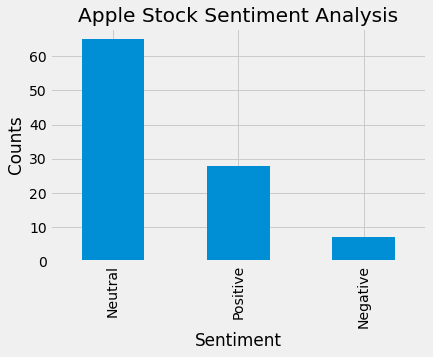

In [161]:
(df_clean.iloc[100:200,5].value_counts().plot(kind = 'bar'))
plt.title('Apple Stock Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.show

In [296]:
import datetime

In [420]:

mean_jan2010 = df_clean.iloc[0:100]['Subjectivity'].mean()
mean_feb2010 = df_clean.iloc[100:200]['Subjectivity'].mean()
mean_mar2010 = df_clean.iloc[200:300]['Subjectivity'].mean()
mean_apr2010 = df_clean.iloc[300:400]['Subjectivity'].mean()
mean_may2010 = df_clean.iloc[400:500]['Subjectivity'].mean()
mean_jun2010 = df_clean.iloc[500:600]['Subjectivity'].mean()
mean_jul2010 = df_clean.iloc[600:700]['Subjectivity'].mean()
mean_aug2010 = df_clean.iloc[700:800]['Subjectivity'].mean()
mean_sep2010 = df_clean.iloc[800:900]['Subjectivity'].mean()
mean_oct2010 = df_clean.iloc[900:1000]['Subjectivity'].mean()



In [457]:
dict = {'Jan 2010':mean_jan2010,
       'Feb 2010': mean_feb2010,
       'Mar 2010': mean_mar2010,
       'Apr 2010': mean_apr2010,
       'May 2010': mean_may2010,
        'Jun 2010': mean_jun2010,
        'Jul 2010': mean_jul2010,
        'Aug 2010': mean_aug2010,
        'Sep 2010': mean_sep2010,
        'Oct 2010': mean_oct2010
    
       }
print(dict)



{'Jan 2010': 0.3621182706182707, 'Feb 2010': 0.26884949494949495, 'Mar 2010': 0.3437174783549784, 'Apr 2010': 0.31073593073593075, 'May 2010': 0.18729523809523807, 'Jun 2010': 0.3319808802308802, 'Jul 2010': 0.3067816544566544, 'Aug 2010': 0.23375865800865797, 'Sep 2010': 0.264734607984608, 'Oct 2010': 0.23140155122655115}


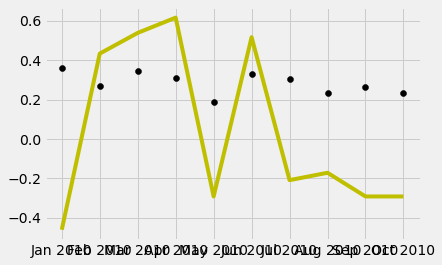

In [428]:
colors = list("rgbcmyk")
for data_dict in d.values():
    x = dict.keys()
    y = dict.values()
    plt.scatter(x,y,color=colors.pop())
    stock_x = dict_stock.keys()
    stock_y = dict_stock.values()
    plt.plot(stock_x,stock_y,color=colors.pop())
   # plt.plot(dict_stock)

#plt.legend(d.keys())
plt.show()

In [437]:
!pip install scipy

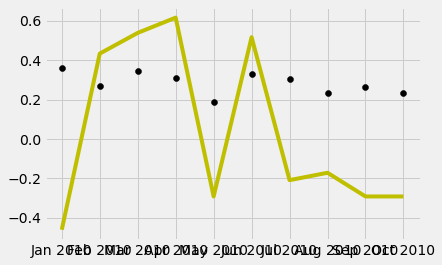

In [440]:
colors = list("rgbcmyk")
for data_dict in d.values():
    x = dict.keys()
    y = dict.values()    
    plt.scatter(x,y,color=colors.pop())
    stock_x = dict_stock.keys()
    stock_y = dict_stock.values()
    plt.plot(stock_x,stock_y,color=colors.pop())
   # plt.plot(dict_stock)
    
#plt.legend(d.keys())
plt.show()

In [498]:
#transforming dictionary into lists for correlation analysis
dictlist_stock=[]
dictlist =[]
for x in dict.values():
    dictlist.append(x)
    
for x in dict_stock.values():
    dictlist_stock.append(x)



[-0.46100591503260435, 0.4332659224337815, 0.538574030189411, 0.6160062997210998, -0.2921854971755161, 0.5166915909028065, -0.20933541339345277, -0.1718478836037218, -0.2921854971755161, -0.2921854971755161]


In [504]:
x1 = np.array([dictlist])
x2 = np.array([dictlist_stock])
r = np.corrcoef(x1, x2)
print('Correlation between Daily Returns and Subjectivity:')
r[0,1]

Correlation between Daily Returns and Subjectivity:


0.387149627802444

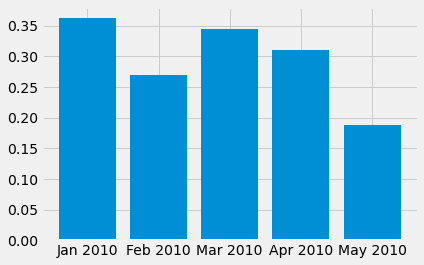

In [379]:

plt.bar(range(len(dict)), list(dict.values()), align='center')
plt.xticks(range(len(dict)), list(dict.keys()))
plt.xlabel='Month' #?
plt.ylabel = 'Mean Subjectivity'#?
plt.show()

In [98]:
a = df_clean.iloc[700:800,5].value_counts()
print(a)

Neutral     66
Positive    32
Negative     2
Name: Analysis, dtype: int64


In [61]:
df_clean.iloc[700:800,5].value_counts()

Neutral     66
Positive    32
Negative     2
Name: Analysis, dtype: int64

In [47]:
df_clean['Analysis'].value_counts()

Neutral     544
Positive    376
Negative     89
Name: Analysis, dtype: int64

In [46]:
df_clean['Analysis'].value_counts(normalize = True)

Neutral     0.539148
Positive    0.372646
Negative    0.088206
Name: Analysis, dtype: float64